# 逆伝播

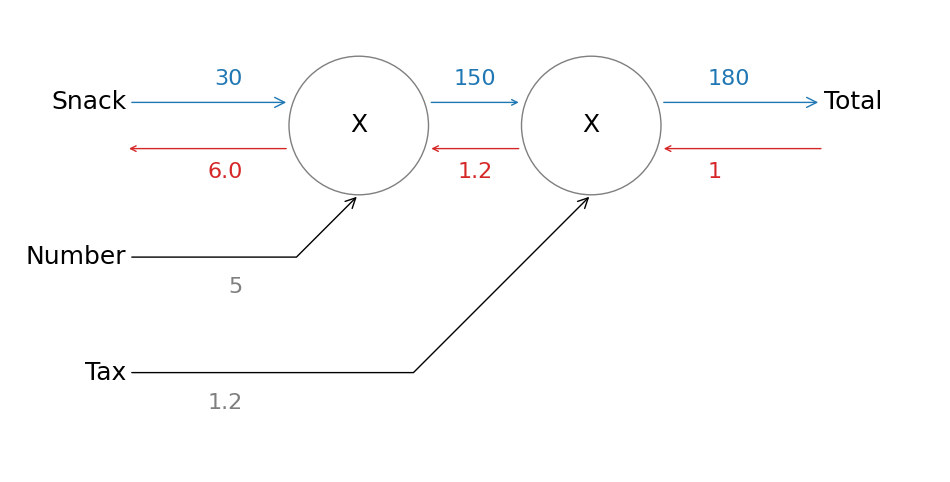

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as pat

labels = ['Snack', 'Number', 'Tax', 'Total']
params = [30, 5, 1.2]
foward = [params[0]*params[1], int(params[0]*params[1]*params[2])]
backward_start = 1
backward = [backward_start*params[2], backward_start*params[2]*params[1]]

fig, ax = plt.subplots(figsize=(12,6))

# node
node_size = 0.3
node_y = 0.5

node1_x = -0.5
node1 = pat.Circle(xy=(node1_x, node_y), radius=node_size, fill=False, color='tab:gray')
ax.add_patch(node1)
ax.text(x=node1_x, y=node_y, s='X', ha='center', va='center', size=18)

node2_x = 0.5
node1 = pat.Circle(xy=(node2_x, node_y), radius=node_size, fill=False, color='tab:gray')
ax.add_patch(node1)
ax.text(x=node2_x, y=node_y, s='X', ha='center', va='center', size=18)

# edge between 2 nodes
edge_y_offset = 0.1
ax.annotate('', 
            xy=(node2_x-node_size, node_y+edge_y_offset), xytext=(node1_x+node_size, node_y+edge_y_offset),
            arrowprops=dict(arrowstyle='->', color='tab:blue'))
ax.text(x=(node1_x + node2_x)/2, y=node_y+edge_y_offset*2, s=foward[0], ha='center', va='center', size=16, color='tab:blue')

ax.annotate('', 
            xy=(node2_x-node_size, node_y-edge_y_offset), xytext=(node1_x+node_size, node_y-edge_y_offset),
            arrowprops=dict(arrowstyle='<-', color='tab:red'))
ax.text(x=(node1_x + node2_x)/2, y=node_y-edge_y_offset*2, s=backward[0], ha='center', va='center', size=16, color='tab:red')

# edge before node
input_x = -1.5
ax.annotate(labels[0],  size='18',
            xytext=(input_x, node_y+edge_y_offset), xy=(node1_x-node_size, node_y+edge_y_offset),
            va="center", ha='right', arrowprops=dict(arrowstyle='->', color='tab:blue'))
ax.text(x=(input_x + node1_x)/2, y=node_y+edge_y_offset*2, s=params[0], ha='right', va='center', size=16, color='tab:blue')
ax.annotate('', 
            xytext=(input_x, node_y-edge_y_offset), xy=(node1_x-node_size, node_y-edge_y_offset),
            va="center", ha='right', arrowprops=dict(arrowstyle='<-', color='tab:red'))
ax.text(x=(input_x + node1_x)/2, y=node_y-edge_y_offset*2, s=backward[1], ha='right', va='center', size=16, color='tab:red')

ax.annotate(labels[1], ha='right', size='18',
            xytext=(input_x, -0.1), xy=(node1_x, node_y-node_size),
            arrowprops=dict(arrowstyle='->', 
                            connectionstyle='angle,angleA=0,angleB=-135,rad=0'))
ax.text(x=(input_x + node1_x)/2, y=-0.2, s=params[1], ha='right', va='center', size=16, color='tab:gray')

ax.annotate(labels[2], ha='right', size='18',
            xytext=(input_x, -0.6), xy=(node2_x, node_y-node_size),
            arrowprops=dict(arrowstyle='->', 
                            connectionstyle='angle,angleA=0,angleB=-135,rad=0'))
ax.text(x=(input_x + node1_x)/2, y=-0.7, s=params[2], ha='right', va='center', size=16, color='tab:gray')

# edge output
output_x = 1.5
ax.annotate(labels[3], size='18', 
            xy=(node2_x+node_size, node_y+edge_y_offset), xytext=(output_x, node_y+edge_y_offset),
            va="center", ha='left', arrowprops=dict(arrowstyle='<-', color='tab:blue'))
ax.text(x=(node2_x + output_x)/2, y=node_y+edge_y_offset*2, s=foward[1], ha='left', va='center', size=16, color='tab:blue')
ax.annotate('', 
            xy=(node2_x+node_size, node_y-edge_y_offset), xytext=(output_x, node_y-edge_y_offset), 
            va="center", ha='left',  arrowprops=dict(arrowstyle='->', color='tab:red'))
ax.text(x=(node2_x + output_x)/2, y=node_y-edge_y_offset*2, s=backward_start, ha='left', va='center', size=16, color='tab:red')

ax.set_xlim(-2, 2.0)
ax.set_ylim(-1, 1)

ax.axis("off")
plt.show()

演算|$x$で偏微分|$y$で偏微分|ようするに
-|-|-|-
$z=x+y$|$\dfrac{\partial z}{\partial x}=1$|$\dfrac{\partial z}{\partial y}=1$|$+$の逆伝播はそのまま戻す
$z=x\times y$|$\dfrac{\partial z}{\partial x}=y$|$\dfrac{\partial z}{\partial y}=x$|$\times$の逆伝播は相手を戻す
$z=x\div y$|$\dfrac{\partial z}{\partial x}=\dfrac{1}{y}$|$\dfrac{\partial z}{\partial y}=-\dfrac{1}{y^2}$|
$sigmoid; y = \dfrac{1}{1 + \exp(-x)}$|$y^2 \exp(-x)$||